In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Datasets
imdb_names = pd.read_csv('data/imdb_names_update', index_col='tconst')
imdb_titles = pd.read_csv('data/imdb_titles', index_col='tconst')
imdb_tn_budgets = pd.read_csv('data/tn_movies_bud_update')
imdb_title_principals_df = pd.read_csv('data/imdb.title.principals.csv.gz')

In [3]:
# Drop 'unnamed: 0' column from tn_movie_budget dataframe
imdb_tn_budgets.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
imdb_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [5]:
imdb_title_principals_df.set_index('tconst', inplace=True)

In [6]:
imdb_names.head()

,primary_name,nconst,primary_profession
tconst,,,
tt0837562,Mary Ellen Bauder,nm0061671,"miscellaneous,production_manager,producer"
tt0896534,Joseph Bauer,nm0061865,"composer,music_department,sound_department"
tt1470654,Bruce Baum,nm0062070,"miscellaneous,actor,writer"
tt0114371,Axel Baumann,nm0062195,"camera_department,cinematographer,art_department"
tt0452644,Pete Baxter,nm0062798,"production_designer,art_department,set_decorator"


In [7]:
imdb_titles.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,NaN
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,NaN,NaN


In [8]:
imdb_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,remade,international_gross,online_release,release_year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,False,804600000,False,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,False,944008095,False,2015
2,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,696540365,False,2017
3,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,False,1116648995,False,2015
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,False,1369318718,False,2018


### 1. Join Dataframes 

Join imdb_titles and imdb_names dataframes

In [9]:
imdb_titles_names = imdb_titles.join(imdb_title_principals_df, how='inner')
imdb_titles_names.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3,ordering,nconst,category,job,characters
tconst,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,10,nm0006210,composer,NaN,NaN
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]"
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]"
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,3,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]"
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,4,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]"


In [10]:
imdb_titles_names.reset_index(inplace=True)

In [11]:
# only include directors in this dataset 
imdb_title_name_directors = imdb_titles_names[imdb_titles_names['category']=='director']

In [12]:
imdb_title_name_directors

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3,ordering,nconst,category,job,characters
5,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,5,nm0712540,director,NaN,NaN
15,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,5,nm0000080,director,NaN,NaN
25,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,NaN,5,nm0611531,director,NaN,NaN
35,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,5,nm0749914,director,original director,NaN
36,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,6,nm0765384,director,completion director,NaN
41,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,NaN,NaN,2,nm0398271,director,NaN,NaN
43,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Horror,Thriller,NaN,1,nm6883878,director,NaN,NaN
57,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",Documentary,History,NaN,3,nm0518037,director,NaN,NaN
58,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",Documentary,History,NaN,4,nm0023406,director,NaN,NaN
76,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,Drama,NaN,NaN,5,nm1030585,director,NaN,NaN


Join imdb_titles_names dataframe with imdb_ratings

In [13]:
imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [14]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
imdb_title_name_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137563 entries, 5 to 960754
Data columns (total 14 columns):
tconst             137563 non-null object
primary_title      137563 non-null object
original_title     137563 non-null object
start_year         137563 non-null int64
runtime_minutes    112926 non-null float64
genres             134476 non-null object
genres_1           134476 non-null object
genres_2           58317 non-null object
genres_3           29169 non-null object
ordering           137563 non-null int64
nconst             137563 non-null object
category           137563 non-null object
job                7251 non-null object
characters         0 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 15.7+ MB


In [16]:
imdb_ratings.set_index('tconst', inplace=True)
imdb_title_name_directors.set_index('tconst', inplace=True)

In [17]:
imdb_title_ratings = imdb_title_name_directors.join(imdb_ratings, 
                              how='inner')

In [18]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75216 entries, tt0063540 to tt9914642
Data columns (total 15 columns):
primary_title      75216 non-null object
original_title     75216 non-null object
start_year         75216 non-null int64
runtime_minutes    67744 non-null float64
genres             74496 non-null object
genres_1           74496 non-null object
genres_2           37872 non-null object
genres_3           19309 non-null object
ordering           75216 non-null int64
nconst             75216 non-null object
category           75216 non-null object
job                3033 non-null object
characters         0 non-null object
averagerating      75216 non-null float64
numvotes           75216 non-null int64
dtypes: float64(2), int64(3), object(10)
memory usage: 9.2+ MB


### Data Visualization  

In [19]:
imdb_title_ratings.genres_1.value_counts()

Drama          18608
Documentary    15291
Comedy         14262
Action          6771
Horror          4779
Biography       3689
Adventure       2749
Crime           2419
Thriller        1492
Animation       1148
Romance          762
Family           594
Fantasy          449
Mystery          425
Sci-Fi           359
Music            196
Musical          149
History          131
Sport            103
Western           65
War               48
Reality-TV         3
News               2
Game-Show          1
Adult              1
Name: genres_1, dtype: int64

In [20]:
genres_1 = list(imdb_title_ratings.genres_1.unique())
genres_2 = list(imdb_title_name_directors.genres_2.unique())
genres_3 = list(imdb_title_name_directors.genres_3.unique())

genres = genres_1 + genres_2 + genres_3
genres_array = np.array(genres)

In [21]:
genres_unique = np.unique(genres_array)
len(genres_unique)

28

In [22]:
genres_unique

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western', 'nan'], dtype='<U11')

In [23]:
imdb_title_name_directors = imdb_titles_names[imdb_titles_names['category']=='director']

In [24]:
# imdb_title_ratings.dropna(inplace=True)

In [25]:
imdb_title_ratings.reset_index(inplace=True)

In [26]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75216 entries, 0 to 75215
Data columns (total 16 columns):
tconst             75216 non-null object
primary_title      75216 non-null object
original_title     75216 non-null object
start_year         75216 non-null int64
runtime_minutes    67744 non-null float64
genres             74496 non-null object
genres_1           74496 non-null object
genres_2           37872 non-null object
genres_3           19309 non-null object
ordering           75216 non-null int64
nconst             75216 non-null object
category           75216 non-null object
job                3033 non-null object
characters         0 non-null object
averagerating      75216 non-null float64
numvotes           75216 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 9.2+ MB


In [27]:
imdb_title_ratings.groupby('genres_1').median().sort_values('averagerating')

,start_year,runtime_minutes,ordering,averagerating,numvotes
genres_1,,,,,
Adult,2015.0,120.0,5.0,2.00,128.0
Reality-TV,2013.0,129.0,5.0,4.70,32.0
Western,2015.0,90.0,5.0,4.90,95.0
Horror,2014.0,88.0,5.0,4.90,75.0
Sci-Fi,2015.0,88.5,5.0,5.50,38.0
News,2012.0,99.5,5.0,5.65,13.5
Thriller,2015.0,90.0,5.0,5.70,49.0
Fantasy,2014.0,90.0,5.0,5.80,43.0
Action,2014.0,98.0,5.0,5.90,200.0


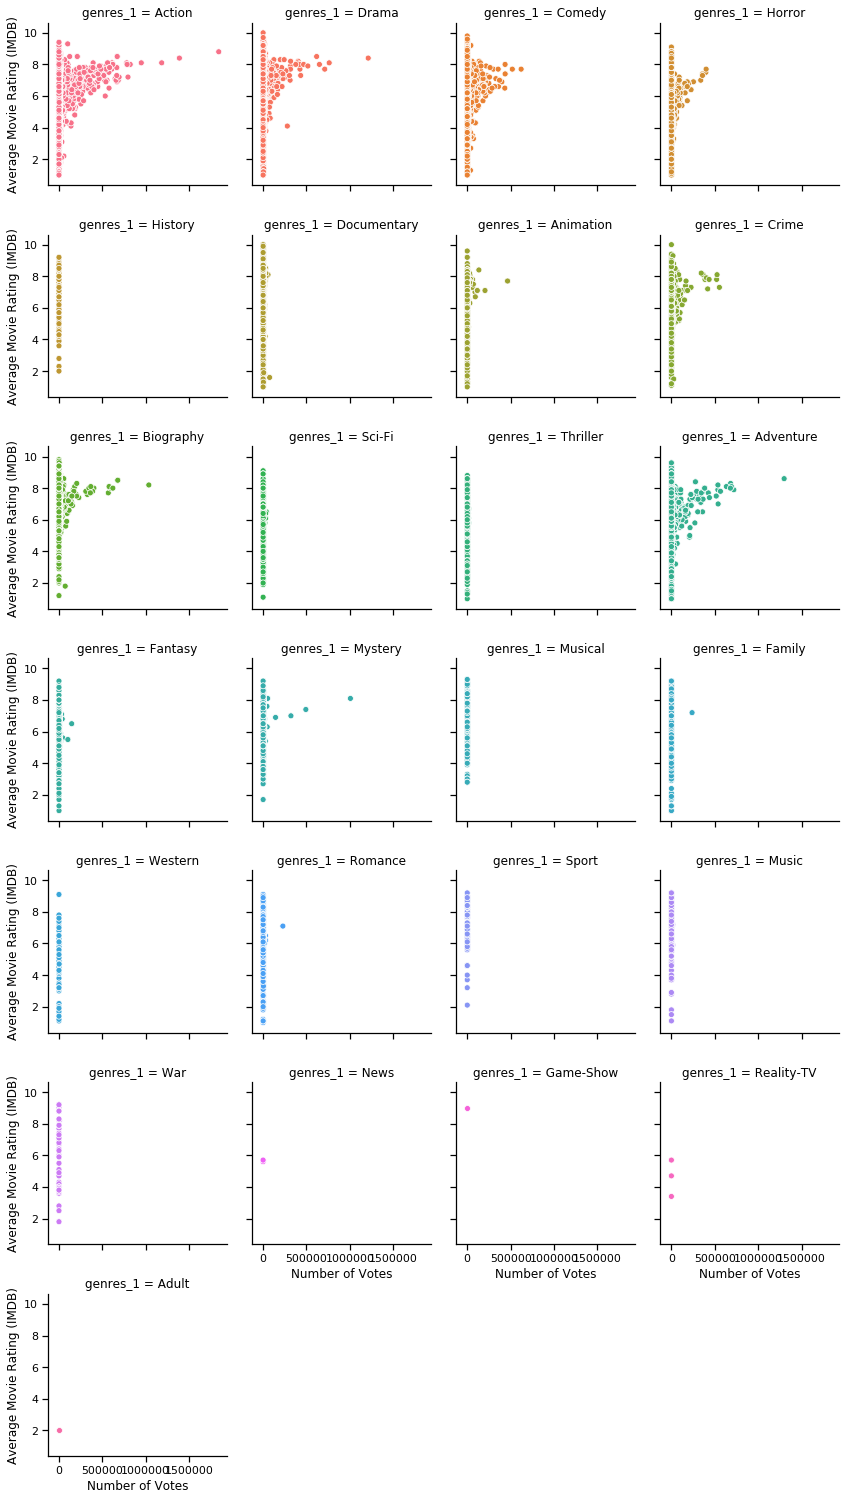

In [28]:
sns.set_context('notebook')
g2 = sns.relplot(y='averagerating', 
            x='numvotes', 
            kind='scatter', 
            hue='genres_1',
            col='genres_1', 
            col_wrap=4,
            height=3,
           data=imdb_title_ratings, 
           legend=None)

axes2 = g2.axes.flatten()

# axes2[0].set_title("Internal")
# axes2[1].set_title("Internal")
# axes2[6].set_title("Internal")

for ax2 in axes2: 
    ax2.set_ylabel("Average Movie Rating (IMDB)")

for ax1 in axes2:
    ax1.set_xlabel("Number of Votes")

    
# g2.savefig('/Users/markishab/Downloads/fig_genres_pop.png')

In [29]:
# choose non-trivial catagories from preceeding visualization 
imdb_genre_set = imdb_title_ratings.loc[(imdb_title_ratings['genres_1']!='Documentary') &
                                        (imdb_title_ratings['genres_1']!='Mystery') &
                                        (imdb_title_ratings['genres_1']!='Romance') &
                                        (imdb_title_ratings['genres_1']!='History') &
                                        (imdb_title_ratings['genres_1']!='Famiily') &
                                        (imdb_title_ratings['genres_1']!='Music') &
                                        (imdb_title_ratings['genres_1']!='Musical')]

In [30]:
# create a column of boolean value for weather the row is any of three values 
imdb_genre_set['color'] = np.where((imdb_genre_set['genres_1']=='Biography') | 
                                   (imdb_genre_set['genres_1']=='Animation') |
                                   (imdb_genre_set['genres_1']=='Adventure'), '1', '0')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


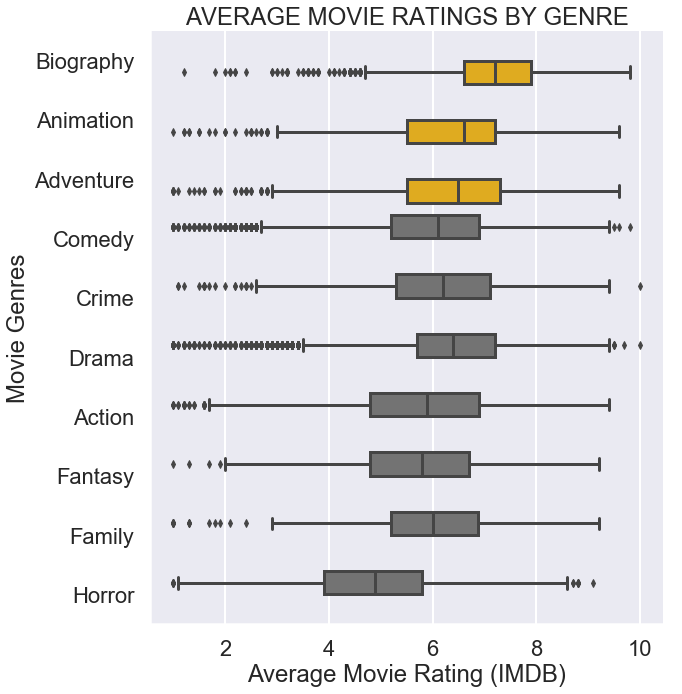

In [60]:
sns.set_context('talk')
# sns.set(rc={'figure.figsize':(40, 40)})
color_palette = ['#737373', '#FFB900']
sns.set_context('poster')
g1 = sns.catplot(x='averagerating',
            y='genres_1', 
           kind='box', 
            col_order=imdb_ratings.averagerating.median(),
            height=10, 
            order=(['Biography', 'Animation', 'Adventure', 'Comedy', 'Crime', 
                    'Drama', 'Action', 'Fantasy', 'Family', 'Horror']),
           data=imdb_genre_set, 
                hue='color',
                 palette=color_palette,
                legend=None)



axes1 = g1.axes.flatten()
axes1[0].set_title("AVERAGE MOVIE RATINGS BY GENRE")
axes1[0].set_ylabel("Movie Genres")

for ax in axes1:
    ax.set_xlabel("Average Movie Rating (IMDB)")

plt.show()
g1.savefig('/Users/markishab/Downloads/fig_genres.png')

#### What directors should we hire 

In [32]:
imdb_title_ratings[imdb_title_ratings['category']=='director']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3,ordering,nconst,category,job,characters,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,5,nm0712540,director,NaN,NaN,7.0,77
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,5,nm0000080,director,NaN,NaN,6.9,4517
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,NaN,5,nm0611531,director,NaN,NaN,6.1,13
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,5,nm0749914,director,original director,NaN,6.5,119
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,6,nm0765384,director,completion director,NaN,6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Horror,Thriller,NaN,1,nm6883878,director,NaN,NaN,4.1,32
6,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,Drama,NaN,NaN,5,nm1030585,director,NaN,NaN,6.8,451
7,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,History,NaN,NaN,5,nm0417352,director,NaN,NaN,4.6,64
8,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,Documentary,NaN,NaN,5,nm0611850,director,NaN,NaN,7.6,53
9,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,Drama,NaN,NaN,5,nm1207262,director,NaN,NaN,6.9,120


In [33]:
# find the average movie rating by person. This is one of the summary tables
avg_ratings_director = imdb_title_ratings.groupby(['nconst', 'category']).mean().sort_values(by='averagerating'
                                                          , ascending=False).drop(['start_year', 
                                                                                   'runtime_minutes', 
                                                                                  'numvotes'], axis=1)

In [34]:
avg_ratings_director.reset_index(inplace=True)
avg_ratings_director.set_index('nconst', inplace=True)
# avg_ratings_director.drop('index')

In [36]:
number_movies = imdb_title_ratings.nconst.value_counts().to_frame()

In [37]:
director_scatter = avg_ratings_director.join(number_movies, 
                         how='inner')

In [38]:
director_scatter.rename(columns={'nconst': 'num_movies'}, inplace=True)

In [39]:
direc_scatter_head = director_scatter.head(200)
direc_scatter_head.reset_index(inplace=True)

In [43]:
direc_scatter_head.head(10)

,index,category,ordering,averagerating,num_movies,color
0,nm10616933,director,1.0,10.0,1,1
1,nm6893562,director,5.0,10.0,1,1
2,nm5472684,director,2.0,10.0,1,1
3,nm4166962,director,5.0,10.0,1,1
4,nm4637768,director,1.0,10.0,1,1
5,nm7223265,director,5.0,10.0,1,1
6,nm3704168,director,1.0,10.0,1,1
7,nm10174241,director,5.0,9.9,1,1
8,nm5000172,director,5.0,9.8,1,1
9,nm9522663,director,1.0,9.8,1,1


In [56]:
imdb_names[(imdb_names['nconst']=='nm10616933')|
          (imdb_names['nconst']=='nm6893562')|
          (imdb_names['nconst']=='nm5472684')|
          (imdb_names['nconst']=='nm4166962')|
          (imdb_names['nconst']=='nm4637768') |
          (imdb_names['nconst']=='nm10174241') |
          (imdb_names['nconst']=='nm5000172') |
          (imdb_names['nconst']=='nm9522663')]

,primary_name,nconst,primary_profession
tconst,,,
tt9743544,Andrew Jezard,nm10174241,"cinematographer,director,producer"
tt1770682,Daniel Alexander,nm4166962,director
tt2155730,Javi Larrauri,nm5000172,"director,editor,writer"
tt4176738,Chad Carpenter,nm6893562,"director,producer,miscellaneous"
tt6047276,Michael J. Sanderson,nm5472684,"cinematographer,camera_department,producer"
tt2006797,Masahiro Hayakawa,nm4637768,"director,producer"
tt9090276,Andrew Jezard,nm10174241,"cinematographer,director,producer"
tt2196500,Javi Larrauri,nm5000172,"director,editor,writer"
tt4944240,Chad Carpenter,nm6893562,"director,producer,miscellaneous"


### create a column of boolean value for weather the row is any of three values 
direc_scatter_head['color'] = np.where((direc_scatter_head['averagerating']>9.9), '1', '0')

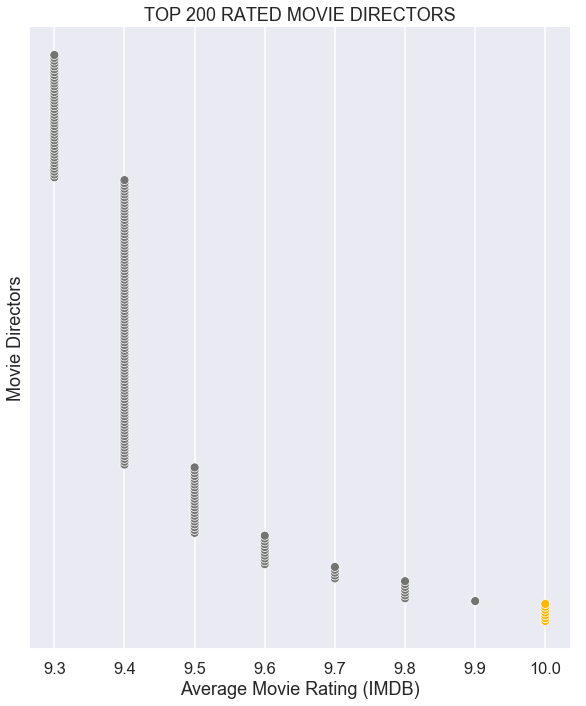

In [65]:
color_palette = ['#737373', '#FFB900']
sns.set_context('talk')
g3 = sns.relplot(y='index', 
           x='averagerating', 
           kind='scatter', 
           data=direc_scatter_head, 
           height=10,
                 hue='color',
                 palette=color_palette,
                legend=None)

g3.set(yticks=[])

axes3 = g3.axes.flatten()
axes3[0].set_title("TOP 200 RATED MOVIE DIRECTORS")
axes3[0].set_ylabel("Movie Directors")

for ax in axes3:
    ax.set_xlabel("Average Movie Rating (IMDB)")
g3.savefig('/Users/markishab/Downloads/fig_directors.png')